In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
#https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d
#https://www.section.io/engineering-education/support-vector-regression-in-python/



In [2]:
#https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

In [3]:
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff
import statsmodels as sm
#https://www.statsmodels.org/dev/vector_ar.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.simplefilter('ignore')
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [4]:
df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/twitter_reddit_time_series_copy3.csv')
df = df.set_index('date')
#train = train.iloc[20:,:]
df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959,1.070900
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.069733
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.071044


In [5]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset

In [6]:
nobs = 31
df_train, df_test = df[0:-nobs], df[-nobs:]
df_test

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/05/2022,1.7979,2.171184,2.880,0.05,155.100579,5.5,65.2,20150.2,22740.959,1.052189
02/05/2022,11.3230,9.070342,2.810,0.05,155.100579,5.5,65.2,20150.2,22740.959,1.052100
03/05/2022,-17.5748,7.017218,2.830,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053200
04/05/2022,-1.6031,4.326948,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053900
05/05/2022,16.8282,3.289849,2.870,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.050700
06/05/2022,-6.9053,2.312886,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.057200
07/05/2022,-4.9242,1.637116,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053933
08/05/2022,14.0925,2.516328,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053944
09/05/2022,28.9857,2.359621,2.750,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.055900


In [7]:
X_train = df_train.drop(['BEIR'],axis=1).values.astype(float)
y_train = df_train['BEIR'].values.astype(float)
X_test = df_test.drop(['BEIR'],axis=1).values.astype(float)
y_test = df_test['BEIR'].values.astype(float)

In [8]:
y = y_train.reshape(-1,1)
y

array([[2.46 ],
       [2.44 ],
       [2.42 ],
       [2.4  ],
       [2.4  ],
       [2.4  ],
       [2.39 ],
       [2.36 ],
       [2.32 ],
       [2.35 ],
       [2.32 ],
       [2.32 ],
       [2.32 ],
       [2.36 ],
       [2.38 ],
       [2.32 ],
       [2.27 ],
       [2.24 ],
       [2.24 ],
       [2.24 ],
       [2.25 ],
       [2.31 ],
       [2.34 ],
       [2.3  ],
       [2.34 ],
       [2.34 ],
       [2.34 ],
       [2.33 ],
       [2.32 ],
       [2.32 ],
       [2.35 ],
       [2.33 ],
       [2.33 ],
       [2.33 ],
       [2.332],
       [2.31 ],
       [2.28 ],
       [2.22 ],
       [2.28 ],
       [2.28 ],
       [2.28 ],
       [2.33 ],
       [2.36 ],
       [2.34 ],
       [2.32 ],
       [2.33 ],
       [2.33 ],
       [2.33 ],
       [2.24 ],
       [2.26 ],
       [2.28 ],
       [2.28 ],
       [2.35 ],
       [2.35 ],
       [2.35 ],
       [2.4  ],
       [2.38 ],
       [2.41 ],
       [2.43 ],
       [2.4  ],
       [2.4  ],
       [2.4  ],
       [

In [9]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = y_train.reshape(-1,1)
y = sc_y.fit_transform(y)

In [10]:
#rbf Kernel

In [11]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)

In [12]:
y_pred

array([[2.56596648, 2.56596648, 2.56596648, 2.56596648, 2.56596648,
        2.56596648, 2.56596648, 2.56596648, 2.56596648, 2.56596648,
        2.56596648, 2.56596648, 2.56596648, 2.56596648, 2.56596648,
        2.56596648, 2.56596648, 2.56596648, 2.56596648, 2.56596648,
        2.56596648, 2.56596648, 2.56596648, 2.56596648, 2.56596648,
        2.56596648, 2.56596648, 2.56596648, 2.56596648, 2.56596648,
        2.56596648]])

In [13]:
y_pred1 = []

for i in y_pred:
    for j in i:
        y_pred1.append(j)
        
y_pred1

[2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664,
 2.5659664769012664]

In [14]:
len(df_test.index)
len(y_test)

31

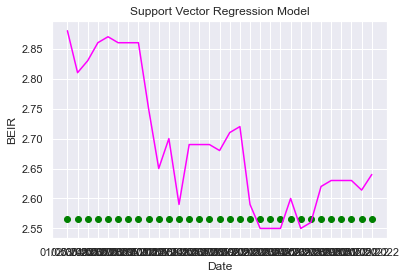

In [15]:
plt.plot(df_test.index, y_test, color = 'magenta')
plt.scatter(df_test.index, y_pred1, color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('Date')
plt.ylabel('BEIR')
plt.show()

In [16]:
np.arange(1,10,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [17]:
#Grid Search

from sklearn.model_selection import GridSearchCV

param = {'C' : np.arange(1,10,0.1),'degree' : np.arange(1,10,1),'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

regressor = SVR()
regressor.fit(X,y)

grids = GridSearchCV(regressor,param,cv=5, scoring ='neg_root_mean_squared_error')

grids.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'coef0': [0.01, 10, 0.5],
                         'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': ('auto', 'scale')},
             scoring='neg_root_mean_squared_error')

In [18]:
grids.cv_results_
grids.best_params_
grids.best_score_*-1

0.1638193975266243

In [19]:
results_df = pd.DataFrame(grids.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]].head()

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
9.300000000000008_0.01_8_scale,"{'C': 9.300000000000008, 'coef0': 0.01, 'degre...",1,-0.163819,0.09121
9.300000000000008_0.5_9_scale,"{'C': 9.300000000000008, 'coef0': 0.5, 'degree...",1,-0.163819,0.09121
9.300000000000008_0.5_8_scale,"{'C': 9.300000000000008, 'coef0': 0.5, 'degree...",1,-0.163819,0.09121
9.300000000000008_0.5_7_scale,"{'C': 9.300000000000008, 'coef0': 0.5, 'degree...",1,-0.163819,0.09121
9.300000000000008_0.5_6_scale,"{'C': 9.300000000000008, 'coef0': 0.5, 'degree...",1,-0.163819,0.09121


In [20]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf',C = grids.best_params_['C'], coef0=grids.best_params_['coef0'],degree=grids.best_params_['degree'],gamma=grids.best_params_['gamma'])
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)

In [21]:
y_pred1 = []

for i in y_pred:
    for j in i:
        y_pred1.append(j)

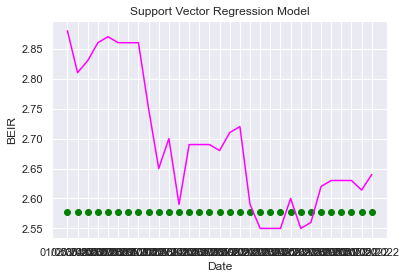

In [22]:
plt.plot(df_test.index, y_test, color = 'magenta')
plt.scatter(df_test.index, y_pred1, color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('Date')
plt.ylabel('BEIR')
plt.show()

In [23]:
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)
metrics.mean_squared_error(y_test, y_pred1, squared = False)
#0.15710018312635934

0.15742447844662993

In [24]:
#https://www.kaggle.com/code/grfiv4/displaying-the-results-of-a-grid-search/notebook
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf") '''
    
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

best parameters: {'C': 9.300000000000008, 'coef0': 0.01, 'degree': 1, 'gamma': 'scale'}
best score:      -0.16382 (+/-0.09121)
{'C': 9.300000000000008,
 'cache_size': 200,
 'coef0': 0.01,
 'degree': 1,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_degree,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4497,0.022298,0.015455,0.008820,0.007045,9.3,0.01,8,scale,"{'C': 9.300000000000008, 'coef0': 0.01, 'degre...",-0.075049,-0.064083,-0.157982,-0.211748,-0.310235,-0.163819,0.09121,1
4535,0.018621,0.015603,0.002958,0.000774,9.3,0.5,9,scale,"{'C': 9.300000000000008, 'coef0': 0.5, 'degree...",-0.075049,-0.064083,-0.157982,-0.211748,-0.310235,-0.163819,0.09121,1
4533,0.030908,0.029171,0.006918,0.008137,9.3,0.5,8,scale,"{'C': 9.300000000000008, 'coef0': 0.5, 'degree...",-0.075049,-0.064083,-0.157982,-0.211748,-0.310235,-0.163819,0.09121,1
4531,0.012991,0.012975,0.020133,0.024512,9.3,0.5,7,scale,"{'C': 9.300000000000008, 'coef0': 0.5, 'degree...",-0.075049,-0.064083,-0.157982,-0.211748,-0.310235,-0.163819,0.09121,1
4529,0.013209,0.014399,0.009863,0.008110,9.3,0.5,6,scale,"{'C': 9.300000000000008, 'coef0': 0.5, 'degree...",-0.075049,-0.064083,-0.157982,-0.211748,-0.310235,-0.163819,0.09121,1
4527,0.029021,0.024841,0.004033,0.001496,9.3,0.5,5,scale,"{'C': 9.300000000000008, 'coef0': 0.5, 'degree...",-0.075049,-0.064083,-0.157982,-0.211748,-0.310235,-0.163819,0.09121,1
4525,0.013010,0.009826,0.007275,0.006758,9.3,0.5,4,scale,"{'C': 9.300000000000008, 'coef0': 0.5, 'degree...",-0.075049,-0.064083,-0.157982,-0.211748,-0.310235,-0.163819,0.09121,1
4523,0.011827,0.008812,0.012563,0.013242,9.3,0.5,3,scale,"{'C': 9.300000000000008, 'coef0': 0.5, 'degree...",-0.075049,-0.064083,-0.157982,-0.211748,-0.310235,-0.163819,0.09121,1
4521,0.013243,0.008168,0.014506,0.015628,9.3,0.5,2,scale,"{'C': 9.300000000000008, 'coef0': 0.5, 'degree...",-0.075049,-0.064083,-0.157982,-0.211748,-0.310235,-0.163819,0.09121,1
4517,0.019253,0.009851,0.008476,0.007713,9.3,10,9,scale,"{'C': 9.300000000000008, 'coef0': 10, 'degree'...",-0.075049,-0.064083,-0.157982,-0.211748,-0.310235,-0.163819,0.09121,1


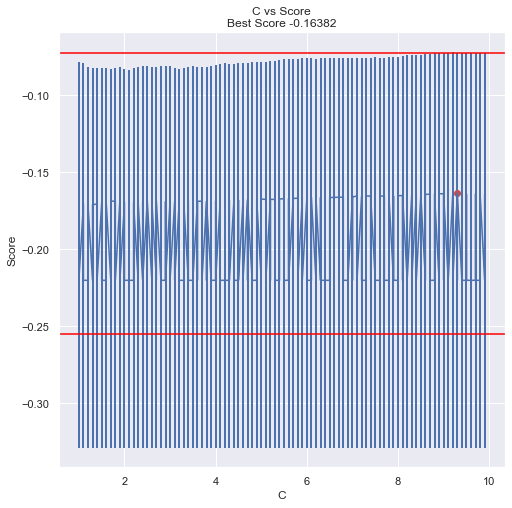

In [25]:
GridSearch_table_plot(grids, "C", negative=False)

In [26]:
#Random Search

In [27]:
from sklearn.model_selection import RandomizedSearchCV

param = {'C' : np.arange(1,10,0.1),'degree' : np.arange(1,10,1),'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

regressor = SVR()
regressor.fit(X,y)

random = RandomizedSearchCV(regressor,param,cv=5, n_jobs = -1, scoring ='neg_root_mean_squared_error',
                             random_state = 1)

random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                                        'coef0': [0.01, 10, 0.5],
                                        'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'gamma': ('auto', 'scale')},
                   random_state=1, scoring='neg_root_mean_squared_error')

In [28]:
random.cv_results_
random.best_params_
#random.best_score_*-1

{'gamma': 'scale', 'degree': 7, 'coef0': 0.01, 'C': 8.800000000000008}

In [29]:
results_df = pd.DataFrame(random.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]].head()

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
scale_7_0.01_8.800000000000008,"{'gamma': 'scale', 'degree': 7, 'coef0': 0.01,...",1,-0.164043,0.091070
scale_5_0.01_6.100000000000005,"{'gamma': 'scale', 'degree': 5, 'coef0': 0.01,...",2,-0.166323,0.090267
scale_4_0.5_6.100000000000005,"{'gamma': 'scale', 'degree': 4, 'coef0': 0.5, ...",2,-0.166323,0.090267
scale_8_10_6.300000000000004,"{'gamma': 'scale', 'degree': 8, 'coef0': 10, '...",4,-0.166542,0.090465
scale_3_0.5_2.6000000000000014,"{'gamma': 'scale', 'degree': 3, 'coef0': 0.5, ...",5,-0.168036,0.086382


In [30]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf',C = grids.best_params_['C'], coef0=grids.best_params_['coef0'],degree=grids.best_params_['degree'],gamma=grids.best_params_['gamma'])
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)

In [31]:
y_pred1 = []

for i in y_pred:
    for j in i:
        y_pred1.append(j)

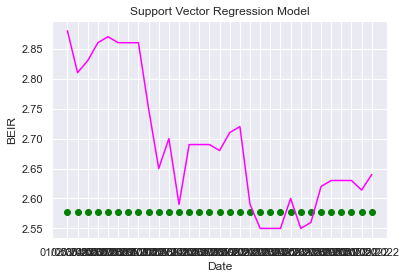

In [32]:
plt.plot(df_test.index, y_test, color = 'magenta')
plt.scatter(df_test.index, y_pred1, color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('Date')
plt.ylabel('BEIR')
plt.show()

In [33]:
rmse = metrics.mean_squared_error(y_test, y_pred1, squared = False)
error = (rmse/np.mean(y_test))*100
print(rmse)
print(error)
#0.15710018312635934

0.15742447844662993
5.850527287800043


In [40]:
y_test = pd.DataFrame(y_test)
y_pred1 = pd.DataFrame(y_pred1)
y_pred2 = pd.DataFrame(y_pred2)

In [41]:

y_test.columns = ['BEIR']
y_pred1.columns = ['BEIR_forecast']
y_pred2.columns = ['BEIR_forecast']

In [42]:
def train_test_plot(model, X_train, X_test, name):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,6))
    colors = sns.color_palette("deep", 8)
    plt.ylim(2.5,3)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"Date": list(yvalues.index), "BEIR_fcast": forecasted})
    df_fcast = df_fcast.set_index("Date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["BEIR_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("Forecasted BEIR vs. Actual BEIR")
    ax.set_ylabel("BEIR")
    ax.set_xlabel("Date")
    ax.legend(["Forecasted BEIR","Actual BEIR"])
    plt.savefig(name)

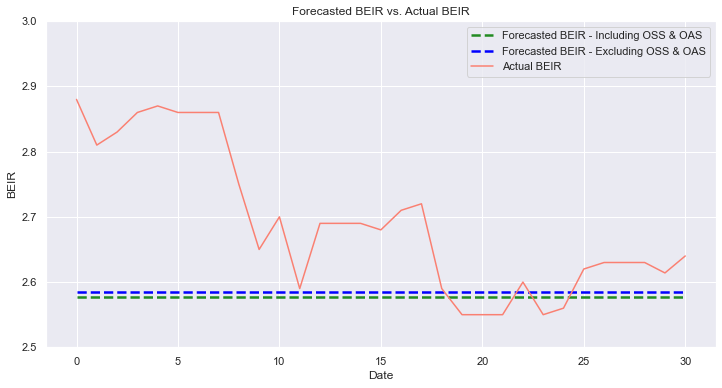

In [44]:
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("deep", 8)
plt.ylim(2.5,3)
    
yvalues = pd.DataFrame(y_test)
    
y_pred1['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
y_pred2['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="blue") # CPI fitted
y_test['BEIR'].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
ax.set_title("Forecasted BEIR vs. Actual BEIR")
ax.set_ylabel("BEIR")
ax.set_xlabel("Date")
ax.legend(["Forecasted BEIR - Including OSS & OAS","Forecasted BEIR - Excluding OSS & OAS",'Actual BEIR'])
plt.savefig('svr_forecast_14-08.png')

In [ ]:
y_pred1.index = df_test.index
y_pred1

In [35]:
X_train1 = df_train.drop(['BEIR','overall_sentiment_score_20d_lag','overall_attention_score_20d_lag'],axis=1).values.astype(float)
y_train = df_train['BEIR'].values.astype(float)
X_test1 = df_test.drop(['BEIR','overall_sentiment_score_20d_lag','overall_attention_score_20d_lag'],axis=1).values.astype(float)
y_test = df_test['BEIR'].values.astype(float)

In [36]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train1)
y = y_train.reshape(-1,1)
y = sc_y.fit_transform(y)

In [37]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf',C = grids.best_params_['C'], coef0=grids.best_params_['coef0'],gamma=grids.best_params_['gamma'])
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X_test1)
y_pred = y_pred.reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)

In [38]:
y_pred2 = []

for i in y_pred:
    for j in i:
        y_pred2.append(j)

In [39]:
rmse = metrics.mean_squared_error(y_test, y_pred2, squared = False)
error = (rmse/np.mean(y_test))*100
print(rmse)
print(error)
#0.15710018312635934

0.15255379772673147
5.669513186669714


In [50]:
y_pred1
y_pred1.to_csv('svr.csv')